<br>

![](Logos.jpg)

# Heat Waves | Warm-up 01: Integration Test of CLIMADA Impact Assessment with Copernicus Climate Change Service (C3S) data (V1)

### About

Welcome to this tutorial, where we embark on a journey to analyze the impact of heat stress using CLIMADA in the context of the U-CLIMADAPT project (User-centric Assessment of Climate Change Impacts for Adaptation). This tutorial is part of a series of three, focusing on *01 Heat Waves|Warm-up, 02 Heat Waves|Scenario*, Heat Stress, and 03 xx. Throughout these tutorials, we will demonstrate how we leverage climate data, particularly seasonal forecast data from the Climate Data Store (CDS) of the Copernicus Climate Change Service (C3S), in conjunction with CLIMADA (CLIMate ADAptation), to estimate the socio-economic or human impacts of climate-related hazards.

### About U-CLIMADAPT

The U-CLIMADAPT project is a collaborative effort led by the Working Group "Impact of Climate Change." Its primary goal is to provide refined climate impact assessments tailored to specific requirements. To achieve this, it leverages the power of climate forecasts and projections from C3S's Climate Data Store (CDS), while also integrating Copernicus land-use and satellite data

### Discover New Possibilities

In U-CLIMADAPT, is dedicated to developing a comprehensive socioeconomic impact model chain using CLIMADA. Your feedback is invaluable as we shape this user-driven approach. Together, we address climate-related hazards like extreme heat, precipitation, agricultural drought, wind storms, and river floods, evaluating their impact on human health, agriculture, assets, and infrastructure. By actively collaborating with users like you from diverse sectors, including public authorities, industry, and academia, we ensure that our assessments are not only socio-economically relevant but also highly applicable to your needs.

### Tutorial Overview

Now, let's dive into the tutorial itself. We will guide you through the following steps:

- Search, download, and visualize the relevant data from the Climate Data Store.
- Set up the hazard, specifically focusing on heat stress.
- Estimate the exposure to heat stress in your chosen area.
- Define vulnerability and calculate the potential damage.

By following this tutorial, you will gain hands-on experience and unlock the potential of integrating CLIMADA with C3S data from Copernicus. Let's get started!

<br>

### Acknowledgments

- **Script Author**: [Dahyann Araya](https://github.com/DahyannAraya?tab=repositories)
- **Reviewer**: [Timo Schmid](https://github.com/timschmi95)

## Search, download and view Copernicus data

Before we begin we must prepare our environment. This includes installing the Application Programming Interface (API) of the CDS, and importing the various python libraries that we will need.

### Install CDS API

To install the CDS API, run the following command. We use an exclamation mark to pass the command to the shell (not to the Python interpreter).

In [1]:
#!pip install cdsapi

### If this pip does not work

#### Window
Please follow the instructions for the Windows installation provided at https://bit.ly/3I6va4D. 
Please note that the Windows installation process requires you to be registered with Copernicus and have a personal key (refer to [http://cds.climate.copernicus.eu] for more information). Additionally, you will need to create a text document in the installation folder of the API and name it ".cdsapirc.txt". Inside the document, paste the following information:

- url: https://cds.climate.copernicus.eu/api/v2
- key: ####################################### 

After saving the content, the document will be named .cdsapirc.txt. Rename the file by removing ".txt" extension.
Once this step is completed, install in the command prompt with "$ pip install cdsapi".

To summarize, the instructions are:

- Follow the installation instructions for cdsapi on Windows at https://bit.ly/3I6va4D.
- Create a text document in the installation folder and name it ".cdsapirc".
- Within the document, paste the provided information and save it.
- Rename the document by removing the ".txt" extension.
- Install cdsapi in the command prompt with "$ pip install cdsapi".


#### macOS
To install CDS API on a Mac, please follow the instructions at https://bit.ly/3LTOgfn.

Note that the installation on Mac requires creating a document with the Terminal where you will install the API. You can do this by typing "touch ~/.cdsapirc" in the Terminal. Then, open the document by typing "nano ~/.cdsapirc" and paste the following information into the document:

- url: https://cds.climate.copernicus.eu/api/v2
- key: #######################################

After saving the content of the document, install the CDS API in the Terminal by typing "pip install cdsapi".

- Follow the instructions on this website: https://bit.ly/3I6va4D to install cdsapi on a Mac.
- Navigate to the directory where you want to install the API by using the 'cd' command in Terminal.
- Type the command 'touch ~/.cdsapirc' in Terminal to create a file for the API key.
- Type the command 'nano ~/.cdsapirc' in Terminal to open the file in a text editor.
- Within the document, paste the provided information and save it.
- Save the file by pressing 'Ctrl + X' and then 'Y'.
- Type the command 'pip install cdsapi' in Terminal to install the cdsapi module.

### Import libraries

We will be working with data in NetCDF format. To best handle this data we will use libraries for working with multidimensional arrays, in particular Xarray. We will also need libraries for plotting and viewing data, in this case we will use Matplotlib and Cartopy.

In [2]:
# CDS API
import cdsapi

# Libraries for working with multidimensional arrays
import numpy as np
import xarray as xr

# Libraries for plotting and visualising data
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns

# Disable warnings for data download via API
import urllib3 
urllib3.disable_warnings()

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning, module="shapely.predicates")
warnings.filterwarnings("ignore", category=RuntimeWarning, module="shapely.constructive")

### Enter your CDS API key

We will request data from the Climate Data Store (CDS) programmatically with the help of the CDS API. Let us make use of the option to manually set the CDS API credentials. First, you have to define two variables: `URL` and `KEY` which build together your CDS API key. The string of characters that make up your KEY include your personal User ID and CDS API key. To obtain these, first register or login to the CDS (http://cds.climate.copernicus.eu), then visit https://cds.climate.copernicus.eu/api-how-to and copy the string of characters listed after "key:". Replace the `#########` below with this string.

In [3]:
URL = 'https://cds.climate.copernicus.eu/api/v2'
#KEY = '196681:d1b1948e-0977-4fe7-b0d7-cb89ad415533'

In [4]:
from climada import CONFIG
KEY = str(CONFIG.cds_api_key)

Here we specify a data directory in which we will download our data and all output files that we will generate:

In [5]:
#DATADIR = './'

In [6]:
import os
DATADIR = "/Users/daraya/Documents/test_data" # create a file to save the data
os.makedirs(DATADIR, exist_ok=True)

In [7]:
#import os
#from climada import CONFIG
#DATADIR = str(CONFIG.data_dir)
#os.mkdir(DATADIR, exist_ok=True)
#os.makedirs(DATADIR, exist_ok=True)

In [8]:
current_directory = os.getcwd()

# Print the current directory
print("Current Directory:", current_directory)

Current Directory: /Users/daraya/Documents/GitHub_files/CDS_Warm_up/CDS_Warm_Up


### Search for data

You can access various data options from Copernicus, including heat waves, on the Copernicus armonissed data acces [WEKEO](https://tdy.lol/EsFix). To search for the forescasting data, visit the [CDS website](https://shorturl.at/gtABP). There, you can access various forecasting data. Currently, the following options are available:

1. [Seasonal forecast anomalies on single levels](https://cds.climate.copernicus.eu/cdsapp#!/dataset/seasonal-postprocessed-single-levels?tab=overview)

This refers to the deviation or difference from the long-term average or climatology of a specific variable (e.g., temperature or precipitation) at single levels (e.g., surface or specific atmospheric levels) in a seasonal forecast. It provides information on how the forecasted values differ from what is considered normal for that particular season.

2. [Seasonal forecast daily and subdaily data on single levels](https://cds.climate.copernicus.eu/cdsapp#!/dataset/seasonal-original-single-levels?tab=overview)

This refers to the availability of daily or subdaily (e.g., hourly) data at single levels in a seasonal forecast. It provides detailed information on the forecasted values of various variables at specific time intervals throughout the season, allowing for more granular analysis and interpretation.

3. [Seasonal forecast monthly statistics on single levels](https://cds.climate.copernicus.eu/cdsapp#!/dataset/seasonal-monthly-single-levels?tab=overview)

This refers to aggregated statistical information, such as mean, minimum, maximum, or standard deviation, calculated on a monthly basis for variables at single levels in a seasonal forecast. It provides summary statistics for each month, giving an overview of the expected conditions during that particular period.

4. [Seasonal forecast subdaily data on pressure levels](https://cds.climate.copernicus.eu/cdsapp#!/dataset/seasonal-original-pressure-levels?tab=overview)

This refers to the availability of subdaily (e.g., hourly) data specifically at different pressure levels (e.g., 500 hPa, 850 hPa) in a seasonal forecast. It provides information on variables such as temperature, wind, or humidity at specific pressure levels, allowing for analysis of atmospheric conditions at different heights.

5. [Seasonal forecast monthly statistics on pressure levels](https://cds.climate.copernicus.eu/cdsapp#!/dataset/seasonal-monthly-pressure-levels?tab=overview)

Similar to point 3, this refers to aggregated statistical information calculated on a monthly basis, but specifically for variables at different pressure levels in a seasonal forecast. It provides summary statistics for each month at specific pressure levels, giving insights into the expected atmospheric conditions at different heights.

6. [Seasonal forecast anomalies on pressure levels](https://cds.climate.copernicus.eu/cdsapp#!/dataset/seasonal-postprocessed-pressure-levels?tab=overview)

Similar to point 1, this refers to the deviation or difference from the long-term average or climatology of a specific variable at different pressure levels in a seasonal forecast. It provides information on how the forecasted values at different heights differ from what is considered normal for that particular season.



Having selected the correct dataset, we now need to specify what product type, variables, temporal and geographic coverage we are interested in. These can all be selected in the **"Download data"** tab. In this tab a form appears in which we will select the parameters like to following to download **(note that these parameters may vary depending on the specific Copernicus data being downloaded)**:

- Product type: `Monthly averaged reanalysis`
- Variable: `2m temperature`
- Year: `1979 to year before present`
- Month: `all`
- Time: `00:00` (default)
- Geographical area: `Europe` 
- Format: `NetCDF`

At the end of the download form, select **"Show API request"**. This will reveal a block of code, which you can simply copy and paste into a cell of your Jupyter Notebook (see cell below) ...

### Download data

... having copied the API request into the cell below, running this will retrieve and download the data you requested into your local directory. However, before you run the cell below, the **terms and conditions** of this particular dataset need to have been accepted in the CDS. The option to view and accept these conditions is given at the end of the download form, just above the **"Show API request"** option.

In [9]:
c = cdsapi.Client(url=URL, key=KEY)

c.retrieve(
    'sis-heat-and-cold-spells',
    {
        'format': 'tgz',
        'variable': 'heat_wave_days',
        'definition': 'health_related',
        'experiment': [
            'rcp8_5',
        ],
        'ensemble_statistic': [
            'ensemble_members_average',
        ],
    },
    f'{DATADIR}/sis-heat-and-cold-spells.tar.gz')

2024-02-14 17:19:51,798 INFO Welcome to the CDS
2024-02-14 17:19:51,798 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-heat-and-cold-spells
2024-02-14 17:19:51,936 INFO Request is queued
2024-02-14 17:19:53,004 INFO Request is running
2024-02-14 17:20:00,321 INFO Request is completed
2024-02-14 17:20:00,323 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data7/dataset-sis-heat-and-cold-spells-0588e8df-ac58-449c-b336-3803d42a1f86.tar.gz to /Users/daraya/Documents/test_data/sis-heat-and-cold-spells.tar.gz (40M)
2024-02-14 17:20:02,305 INFO Download rate 20.2M/s  


Result(content_length=41946935,content_type=application/gzip,location=https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data7/dataset-sis-heat-and-cold-spells-0588e8df-ac58-449c-b336-3803d42a1f86.tar.gz)

### Inspect data

Now that we have downloaded the data, we can inspect it. We have requested the data in NetCDF format. This is a commonly used format for array-oriented scientific data. To read and process this data we will make use of the [Xarray](http://xarray.pydata.org/en/stable/) library. Xarray is an open source project and Python package that makes working with labelled multi-dimensional arrays simple and efficient. We will read the data from our NetCDF file into an [xarray.Dataset](https://xarray.pydata.org/en/stable/generated/xarray.Dataset.html).

In [10]:
import tarfile
tar_file = f"{DATADIR}/sis-heat-and-cold-spells.tar.gz"

# Print files names and extract
with tarfile.open(tar_file, "r:gz") as file:
    print(file.getnames())
    file.extractall(DATADIR)

#file.close()

['HWD_EU_health_rcp85_mean_v1.0.nc']


In [11]:
hwd_eu_rcp85_mean = f'{DATADIR}/HWD_EU_health_rcp85_mean_v1.0.nc'
hwd_eu_rcp85_mean

'/Users/daraya/Documents/test_data/HWD_EU_health_rcp85_mean_v1.0.nc'

In [12]:
import xarray as xr
ds = xr.open_dataset(hwd_eu_rcp85_mean)
ds

<xarray.Dataset>
Dimensions:        (lat: 425, lon: 599, time: 100)
Coordinates:
    height         float64 ...
  * lat            (lat) float64 30.1 30.2 30.3 30.4 ... 72.2 72.3 72.4 72.5
  * lon            (lon) float64 -24.9 -24.8 -24.7 -24.6 ... 34.6 34.7 34.8 34.9
  * time           (time) datetime64[ns] 1986-01-01 1987-01-01 ... 2085-01-01
Data variables:
    HWD_EU_health  (time, lat, lon) float32 ...
Attributes:
    title:          Processed EURO-CORDEX future climate data for the health ...
    conventions:    CF-1.6
    project:        Copernicus Climate Change Service Sectoral Information Sy...
    source:         Processing of bias-corrected EURO-CORDEX data by VITO
    contact:        bd_rma@vito.be
    creation_date:  Mon Jun 24 12:30:06 2019
    institution:    VITO (https://vito.be/en)

In [13]:
# Extract variable
hwd_eu_rcp85_mean = ds['HWD_EU_health']

# Extract variable for the time of interest with isel() method :)
# hwd_eu_rcp85_mean.isel(time=98) retrieves the data or value corresponding to the 98th time step of the variable hwd_eu_rcp85_mean, time range from 0-99.
# hwd_eu_rcp85_mean = hwd_eu_rcp85_mean.isel(time=60)

In [14]:
# Shape and sizes
print(hwd_eu_rcp85_mean.shape)
print(hwd_eu_rcp85_mean.size)

(100, 425, 599)
25457500


### Plot data

Now we will see how we can get a better understanding of the data by visualising a specific time step. With the help of Cartopy and Matplotlib, we will create a cartographic chart. By setting the Plate Carrée projection, we ensure an accurate geographical representation. Next, we create a figure with axes to prepare the graph. Using the isel() function, we will select the desired time step and plot it using the built-in plot() function provided by xarray. To provide additional context, we will add coastlines and grids to the graph. Finally, we will display the plot, allowing us to explore and analyse the data effectively.

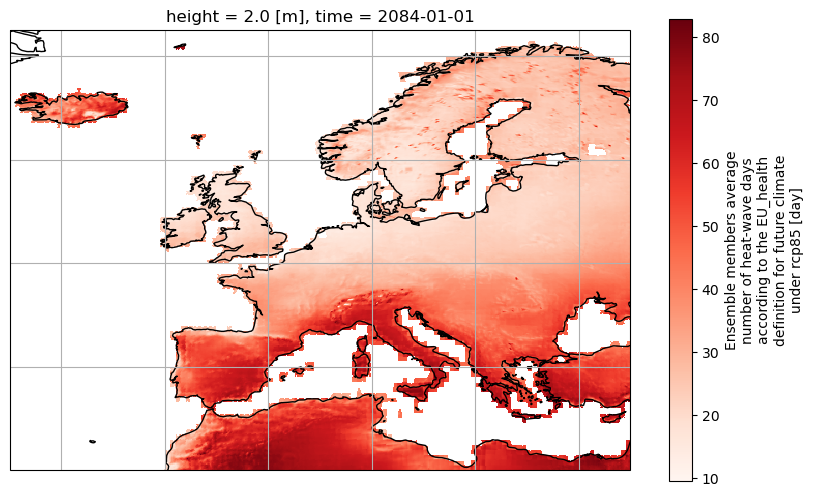

In [15]:
import cartopy.crs as ccrs

# Set projection to PlateCarree EPSG:4326
proj = ccrs.PlateCarree()

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': proj})

# Plot the data isel() method 
hwd_eu_rcp85_mean.isel(time=98).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Reds')

# Add coastlines and gridlines
ax.coastlines()
ax.gridlines()
plt.show()

KeyboardInterrupt: 

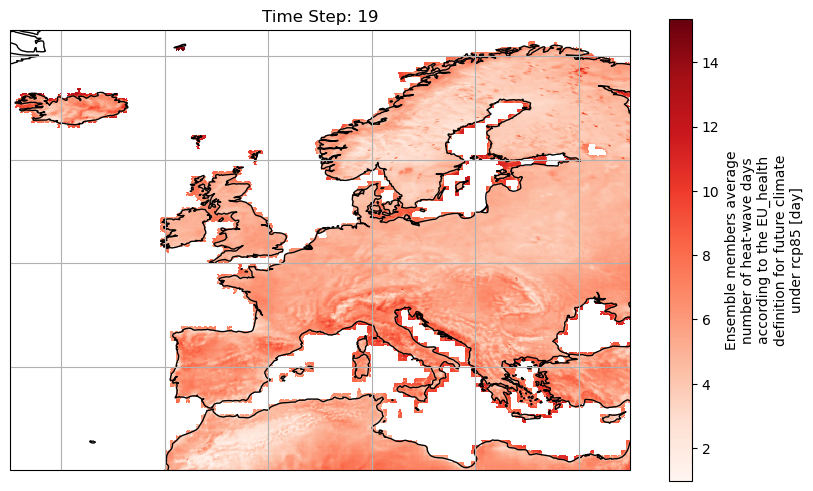

In [16]:
# Time Map Plotting and Saving Loop of heat waves

# Set projection to PlateCarree EPSG:4326
proj = ccrs.PlateCarree()

# Loop through the desired time range
for t in range(99):
    # Create a new figure and axes for each time step
    fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': proj})

    # Plot the data for the current time step
    data = hwd_eu_rcp85_mean.isel(time=t)
    data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Reds')

    # Add coastlines and gridlines
    ax.coastlines()
    ax.gridlines()

    # Set a title for the plot
    ax.set_title(f"Time Step: {t+1}")

    # Save the plot as a PNG file
    #plt.savefig(f"time_map_{t+1}.png")
    plt.savefig(os.path.join(DATADIR, f"time_map_{t+1}.png"))

    # Close the figure to free up resources
    plt.close(fig)

## Start estimating the impact via CLIMADA

### Install CLIMADA

CLIMADA is compatible with Windows, macOS, and Linux operating systems. It can be installed from source code and offers two installation options: user installation and expert/developer installation. Please refer to the [installation guide](https://climada-python.readthedocs.io/en/latest/guide/install.html) for detailed instructions. For these tutorials, we require the expert installation.

>Tip: Additionally, CLIMADA provides datasets through its [Data-API](https://climada.ethz.ch/data-types/), including centroid data, hazard data, and exposure data, which can be easily utilized for CLIMADA analyses

## Set up hazard

### Set a heat wave hazard 

In this first exercise, our goal is to analyze the heatwave hazard in Europe using the [heatwave days dataset from Copernicus](https://cds.climate.copernicus.eu/cdsapp#!/dataset/sis-heat-and-cold-spells?tab=overview). The dataset provides information for different future time periods and considers climate change scenarios, specifically RCP 8.5 and 4.6.

A bias-adjusted EURO-CORDEX dataset is utilized, offering temperature data from 1971 to 2100. By averaging the statistics over 30-year intervals, a smoothed mean time series spanning 1986 to 2085 is obtained. The dataset provides temperature data with a resolution of 0.1° in latitude and longitude, equivalent to approximately 11 kilometers at the equator.

By conducting this exercise, we aim to gain insights into the long-term heatwave trends in Europe, taking into account future projections and climate change scenarios. This analysis can contribute to a better understanding of the potential impacts of heatwaves on the region and inform relevant mitigation and adaptation strategies.

>**Important:** CLIMADA currently operates using the EPSG:4326 projection, also known as WGS 84. To ensure compatibility, your data must be transformed to this coordinate system. Support for additional coordinate systems will be added in the near future.

>**Note**: CLIMADA uses sparse matrices for computational and memory efficiency. Sparse matrices store only non-zero elements, saving memory and speeding up calculations, especially for large datasets. This approach enhances scalability and flexibility, allowing the model to handle larger and more complex problems efficiently. It also facilitates integration with other scientific computing tools.


>**Note:** Please be aware that in CLIMADA, any missing, Not Applicable or "NA" values in the hazard matrix will be substituted with zeros.

>**Tip:** If you only want to know how much of the population has been or will be affected by heatwaves, you can convert the continuous heatwave values to binary data. This way, you will know whether or not the population is affected by heatwaves, without having to consider the magnitude of the heatwaves.

>**Tip:** If you only want to see the content of a hazard you can use **print(dir(hazard))**

In [ ]:
# Create a hazard

from climada.hazard import Hazard

hwd_eu_rcp85_mean = f'{DATADIR}/HWD_EU_health_rcp85_mean_v1.0.nc'
hazard = Hazard.from_xarray_raster_file(f'{DATADIR}/HWD_EU_health_rcp85_mean_v1.0.nc', 
                                        hazard_type='Heat_waves_days', 
                                        intensity_unit="days", 
                                        intensity="HWD_EU_health", 
                                        coordinate_vars=dict(event="time", longitude="lon", latitude="lat"))
hazard.check()

hazard.event_name = list(map(lambda x: pd.Timestamp(x).isoformat(), hazard.event_name))


# Access hazard attributes
print('Hazard attributes:')
print(' - Shape of intensity:', hazard.intensity.shape)
print(' - Centroids:', hazard.centroids.shape)
print(' - Units:', hazard.units)
print(' - event_id:', hazard.event_id)
print(' - frequency:', hazard.frequency)
print(' - orig:', hazard.orig)
print(' - min, max fraction:', hazard.fraction.min(), hazard.fraction.max())
print(' - Date:', hazard.date)
print('min, max fraction: ', hazard.fraction.min(), hazard.fraction.max())
print(' - event_name:')
hazard.event_name

We can also visualize the hazard; in this case, we will visualize the hazard for events 1 and 99.

In [ ]:
# Plot the intensity of the first event
hazard.plot_intensity(1, smooth=False)  # if smooth=True (default value) is used, the computation time might increase
# Plot the intensity of the 99th event
hazard.plot_intensity(99, smooth=False)  # if smooth=True (default value) is used, the computation time might increase

#### Explore hazard data

To understand the hazard, it is necessary to explore the data in its time series. Here, we demonstrate how it is possible to explore the data.

In [ ]:
# 1.How many synthetic events are contained?
print('1. Number of total events:', hazard.size)
print('1.1 Number of synthetic events:', np.logical_not(hazard.orig).astype(int).sum())

# 2. Identify the historical heat waves ocurring between 1995 and 2001.
hist_hazard = hazard.select(date=('1995-01-01','2001-12-31'))
print('2. Number of historical events between 1995 and 2001:', len(hist_hazard.event_id))

# 3. Minimum, Maximum, and Shape
print('3.1. Minimum:',np.nanmin(hazard.intensity.todense()))
print('3.2. Maximum:',hazard.intensity.max())  
print('3.3. Shape (columns and rows):', hazard.intensity.shape)  

# Re-project to World Mercator (EPSG:4326)
# centroids.set_geometry(centroids.geometry.to_crs(epsg=4326), crs=CRS.from_epsg(4326))

# 4. Intensities of all the events in centroid closest Londres to lat, lon = (51, -0.2)
hazard.plot_intensity(centr=(51, -0.2));

# 5. Intensities of all the events in centroid closest Granada to lat, lon = (37, -3.5)
hazard.plot_intensity(centr=(37, -3.5));

We can also explore and visualise the return period of the hazard under study. 

In [ ]:
hazard.plot_rp_intensity(return_periods=(25, 50, 100, 250), smooth=True, axis=None, figsize=(9, 13), adapt_fontsize=True)

In [ ]:
# A histogram can help you understand the distribution of intensity values.

# Convert the sparse matrix to a dense array
intensity_array = hazard.intensity.toarray()
print("Max intensity:", np.max(intensity_array))
print("Min intensity:", np.min(intensity_array))
print("Mean intensity:", np.mean(intensity_array))
print("Standard Deviation:", np.std(intensity_array))

plt.hist(intensity_array.flatten(), bins=50, color='c')
plt.title('Intensity Histogram')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.show()

The graph below illustrates the intensification of heat waves across various locations over time.

In [ ]:
# Represents the intensity of heat wave events, retrieved from the dataset as an array
intensity = ds['HWD_EU_health'].values # Represents the intensity of heat wave events, retrieved from the dataset as an array
intensity[np.isnan(intensity)] = 0 # Handle missing values (NaN) in the intensity array

# Calculate the average intensity across all locations for each event
average_intensity = intensity.mean(axis=1)

# Get the number of events
num_events = average_intensity.shape[0]

# Calculate the mean of the average intensities
mean_intensity = np.mean(average_intensity)

# Create the plot
plt.plot(range(1, num_events + 1), average_intensity, color='grey', alpha=0.3)

# Plot the mean line
plt.plot(range(1, num_events + 1), [mean_intensity] * num_events, color='red', linestyle='--', label='Mean')

# Customize the plot
plt.xlabel("Event")
plt.ylabel("Intensity")
plt.title("Hazard Intensity per Event Across Locations")
plt.legend()

# Set the x-axis tick labels
years = np.array([1985, 2005, 2025, 2045, 2065, 2085])
tick_positions = np.linspace(1, num_events, len(years))
plt.xticks(tick_positions, years)

# Show the plot
plt.show()

#### Save hazard data

We will now save the hazard data in .h5 format. Afterward, we will retrieve and visualize it to demostrate how we can reconstruct a map from the data.

>**Tip:** For optimal performance in both saving and retrieving data, we recommend using the .h5 format with CLIMADA. While there are multiple formats available for saving data, the .h5 format is the most efficient.

In [ ]:
# Save the hazard as.h5
filename = f'{DATADIR}/haz_heat_waves.h5'
hazard.write_hdf5('filename') 

# Read the hazard
haz = Hazard.from_hdf5('filename')

In [ ]:
# Plot the hazard for event 0 from .h5
haz.plot_intensity(event=0)
haz.intensity

#### Generate and Save Hazard Maps

In this step, we will generate and save hazard maps for each year's heatwave output. To ensure a consistent and unified mapping across different time steps, we have defined a custom color map ranging from white to red. This color map will be applied consistently to all the maps generated in this analysis. The saved maps will be valuable for further analysis and examination of heatwave patterns.

In [ ]:
import matplotlib.colors as mcolors
import os

# Define the custom colormap for consistent and coherent mapping across time and export
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', ['#FDF2EC', '#6A1315'])
cmap.set_under('white')

cmap = plt.get_cmap("Reds").copy()
cmap.set_under('white')

# Create a dummy ScalarMappable object
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0.01, vmax=90))
# sm.set_array([])

# Create a colorbar
# cbar = plt.colorbar(sm)

for event in range(100):
    # Plot the hazard for the current event
    im = haz.plot_intensity(event=event, cmap=cmap, vmin=0.01, vmax=90)  # Set the minimum and maximum values for the color ramp

    # Manually set the color of 0 to white
    # cmap.set_under('white')

    # Save the plot as a PNG file in the specified directory
    plt.savefig(os.path.join(DATADIR, f"hazard_{event}.png"))

    # Close the plot to free up resources
    plt.close()

## Estimate exposure:

After creating the hazard, we will proceed to create the exposure. Exposure refers to the collection of assets, individuals, infrastructure, and other elements within a specific area of interest that may be vulnerable to hazards. It encompasses their geographical coordinates, values, and other relevant information. There are two main options for obtaining exposure data:

- CLIMADA's Ready-to-Use Data: CLIMADA offers pre-existing exposure data called LitPop. LitPop combines estimates of asset value, economic activity, or population based on nightlight intensity and population count data. [Click for more information](https://climada-python.readthedocs.io/en/stable/tutorial/climada_entity_LitPop.html) 

- Custom Data: If you have your own exposure data, you can provide the necessary information, such as asset values, economic activity, or population, to describe the exposed elements. [Click for more information](https://climada-python.readthedocs.io/en/stable/tutorial/climada_entity_Exposures.html#Exposures-from-an-excel-file) 

Let's begin by exploring the utilization of LitPop exposure data (here we will downlaod data for europe and then we will refine our selection to switzerland and germany) and subsequently creating our own exposure data based on the Worldpop population count grid.

### Import class LitPop

#### Explore LitPop data

In [ ]:
from climada.util.api_client import Client
client = Client()

In [ ]:
# Fetch the list of data type infos on CLIMADA

data_types = client.list_data_type_infos()
dtf = pd.DataFrame(data_types)
dtf.sort_values(['data_type_group', 'data_type'])

In [ ]:
# Fetch the list of LitPop dataset infos for Germany and Switzerland
litpop_datasets = client.list_dataset_infos(data_type='litpop', properties={'country_name':  ['Germany', 'Switzerland']})
litpop_df = client.into_datasets_df(litpop_datasets)
litpop_df # The 150 arcsec is app 4.631 kilometers

#### Visualize Exposures LitPop

We will now turn our attention to the LitPop data to be used in this demonstration. But first, there are a few points to mention:
- You can provide either single countries or a list of countries.
- Load a default LitPop exposure entity for Switzerland and Germany in the year 2018 (ISO3-Codes 'CHE' and 'DEU').
- To incorporate all EU countries, you should add each of them like: ['AUT', 'BEL', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LTU', 'LUX', 'MLT', 'NLD', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP', 'SWE', 'CHE'].
- The default mode provides information on USD assets, while *fin_mode='pop'* provides information on population counts.
- To determine the weight between GDP and population in the LitPop operation, you can use, for instance, exponents=(1,0). This results in the following formula for creating the LitPop asset distribution: LitPop = Population^1 * GDP^0.

>**Tip:** The LitPop population data is based on gridded night lights from NASA at a 0.5 km resolution and gridded population data from CIESIN at a 1 km resolution. Therefore, LitPop can be retrieved at a maximum resolution of 0.5 km. Set with *"res_arcsec"*. [More information](https://essd.copernicus.org/articles/12/817/2020/)

In [ ]:
# Import class LitPop:
from climada.entity import LitPop
import rasterio

try:
    exposure = LitPop.from_countries(['CHE', 'DEU'], res_arcsec=120, fin_mode='pop', exponents=(2,1)) 
except FileExistsError as err:
    print("Reason for error: The GPW population data has not been downloaded, c.f. section 'Input data' above.")
    raise err

# Plot using exposure.plot_scatter()
plot = exposure.plot_scatter()

# Get the current axis
ax = plt.gca()

# Modify the size of axis labels
fontsize_val = 12
plt.xticks(fontsize=fontsize_val)
plt.yticks(fontsize=fontsize_val)

# Set y-ticks and their labels to represent values in thousands
yticks = ax.get_yticks()
ax.set_yticks(yticks)
ax.set_yticklabels([f'{ytick/1000:.1f}k' for ytick in yticks], clip_on=True)

# Ensure everything fits within the figure boundaries
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Visualize table of exposures LitPop
exposure.gdf.head()

In [ ]:
# Print exposure shape
print(exposure.gdf.shape) # 45763 rows and 6 columns

In [ ]:
# Calculate the total population for each country
switzerland_population = round(exposure.gdf.loc[exposure.gdf['region_id'] == 756, 'value'].sum())
germany_population = round(exposure.gdf.loc[exposure.gdf['region_id'] == 276, 'value'].sum())
total_population = switzerland_population+germany_population

# Print the population count for Switzerland and Germany
print("Population in Switzerland:","{:,}".format(switzerland_population))
print("Population in Germany:","{:,}".format(germany_population))
print("Total Population:", "{:,}".format(total_population))

### Import own raster exposure from Worldpop (Total population counts)

Let's create our own exposure data by downloading population data for Switzerland and Germany at 1 km resolution for the year 2020 from Worldpop. We will then combine the data for both countries to create a single exposure mosaic.

Here are the steps to follow:

1. Download the population data:
- Visit the Worldpop website [worldpop.org](https://www.worldpop.org) or the specific data repository where the population data is available.
- Search and download the population data for Switzerland and Germany at 1 km resolution for 2020.
- Make sure to download the data in a format compatible with your analysis or processing requirements (e.g. raster file format).
2. Merge the data to create a single exposure mosaic:
- Use programming libraries such as GDAL or Rasterio to merge the population data for Switzerland and Germany into a single raster mosaic.
- The merging process should align the data correctly, considering their spatial resolution and coordinate system.


In [ ]:
from rasterio.windows import Window
from climada.entity import Exposures

In [ ]:
# Access and store Swiss population data
import urllib.request

url = "ftp://ftp.worldpop.org.uk/GIS/Population/Global_2000_2020_1km_UNadj/2020/CHE/che_ppp_2020_1km_Aggregated_UNadj.tif"
filename = "che_ppp_2020_1km_Aggregated_UNadj.tif"
file_path = os.path.join(DATADIR, filename)  # Full file path within the DATADIR directory

try:
    urllib.request.urlretrieve(url, file_path)
    print("Download completed successfully.")
except Exception as e:
    print("An error occurred while downloading the file:", e)


In [ ]:
# Access and store Germany population data
url = "ftp://ftp.worldpop.org.uk/GIS/Population/Global_2000_2020_1km_UNadj/2020/DEU/deu_ppp_2020_1km_Aggregated_UNadj.tif"
filename = "deu_ppp_2020_1km_Aggregated_UNadj.tif"
file_path = os.path.join(DATADIR, filename)  # Full file path within the DATADIR directory

try:
    urllib.request.urlretrieve(url, file_path)
    print("Download completed successfully.")
except Exception as e:
    print("An error occurred while downloading the file:", e)


In [ ]:
raster_DEU = f"{DATADIR}/deu_ppp_2020_1km_Aggregated_UNadj.tif"
raster_CHE = f"{DATADIR}/che_ppp_2020_1km_Aggregated_UNadj.tif"

In [ ]:
# Read the raster data and create the Exposures instance for each country
exp_raster_DEU = Exposures.from_raster(raster_DEU)
exp_raster_CHE = Exposures.from_raster(raster_CHE)
exp_raster_DEU.check()
exp_raster_CHE.check()

#### Explore exposure data for each country

In [ ]:
print('Meta:', exp_raster_DEU.meta)
print('Meta:', exp_raster_CHE.meta)

In [ ]:
print('\n' + '\x1b[1;03;30;30m' + 'exp_raster looks like:' + '\x1b[0m')
print(exp_raster_DEU.gdf.head())

In [ ]:
# Calculate the total population for each country
switzerland_population = round(exp_raster_CHE.gdf['value'].sum())
germany_population = round(exp_raster_DEU.gdf['value'].sum())
total_population = switzerland_population+germany_population

# Print the population count for Switzerland and Germany
print("Population in Switzerland:","{:,}".format(switzerland_population))
print("Population in Germany:", "{:,}".format(germany_population))
print("Total Population:", "{:,}".format(total_population))

#### Create a mosaic and explore the exposure data for the study area

We can create a mosaic to have the exposed population of the study area as a whole which is more efficient for analysis. 

In [ ]:
# Generating Exposure Mosaic

import subprocess

# set the paths to the input rasters
raster_DEU = f"{DATADIR}/deu_ppp_2020_1km_Aggregated_UNadj.tif"
raster_CHE = f"{DATADIR}/che_ppp_2020_1km_Aggregated_UNadj.tif"

# set the path to the output mosaic raster
output_raster = f"{DATADIR}/mosaic.tif"

# create the gdal_merge command as a list of strings
gdal_merge_cmd = [
    "gdal_merge.py",  # the gdal_merge tool
    "-o", output_raster,  # the output mosaic raster
    "-of", "GTiff",  # the output format (GeoTIFF)
    raster_DEU, raster_CHE  # the input rasters to be merged
]

# call gdal_merge using subprocess
subprocess.run(gdal_merge_cmd)

exp_worldpop = Exposures.from_raster(output_raster)

# Method is used to assign the centroids of hazard events to the exposure data. 
# This step allows for the association of hazard events with specific population locations.
exp_worldpop.assign_centroids(hazard) 

exp_worldpop.check()

print('Meta:', exp_worldpop.meta)
print(type(exp_worldpop))
print('\n' + '\x1b[1;03;30;30m' + 'exp_raster looks like:' + '\x1b[0m')
print(exp_worldpop.gdf.head())

# Print exposure shape
print(exp_worldpop.gdf.shape)

# Calculate the total population for each country
total_population = exp_worldpop.gdf['value'].sum()

# Print the population count for Switzerland and Germany
print("Population in Switzerland:","{:,}".format(switzerland_population))
print("Population in Germany:", "{:,}".format(germany_population))
print("Total Population:", "{:,}".format(total_population))

#### Visualize exposures Worldpop

In [ ]:
from climada.entity import Exposures

# Plot the exp_raster using the plot_hexbin method
print('\x1b[1;03;30;30m' + 'Plotting exp_raster.' + '\x1b[0m')
axs = exp_worldpop.plot_hexbin()
plt.ylabel('Population counts')

## Set up vulnerability and calculate damages

We will now explore the impact of heat waves on population. To do this, we will utilize hazard data spanning 100 years (from 1986 to 2085) as well as population data from LitPop. For this exercise, we will keep the exposure static, using only the population data from the year 2020. In subsequent exercises, we will incorporate future population scenarios.

Through impact estimation, we will generate a variety of statistics and graphs. You will learn how to calculate, create, and save these for further research.

The first step involves constructing an impact matrix that includes all the relevant parameters needed for a comprehensive impact assessment. This matrix will serve as a central repository for data, facilitating in-depth analysis and evaluation. Once the matrix is created, we will ensure its accessibility by saving it in all formats currently supported by CLIMADA.

In parallel, we will produce a series of maps that depict the impact of heat waves at various time points within the 100-year period under study. These maps will offer insights into both the spatial distribution of impact and temporal trends. To maintain the integrity and compatibility of this mapping data, we will save it in all geospatial formats supported by CLIMADA, allowing you to browse and select the format that best suits your needs.

### Creating a impact funtion

Here, we create a "dummy" impact function to examine the interaction of heat waves in LitPop. The impact function is created by utilizing the previously generated hazard and exposure datasets.

The impact function is crafted, incorporating the following key elements, [click for more information](https://climada-python.readthedocs.io/en/latest/tutorial/climada_engine_Impact.html):

* Intensity: This array represents the intensity levels of the hazard. It is created using the np.linspace function, which generates a sequence of evenly spaced values between the specified start (0) and end (10) points. In this case, the array contains 100 intensity levels ranging from 0 to 10.

* MDD: This array represents the Mean Degree of Damage (MDD) values associated with the hazard intensity levels. Similar to intensity, it is created using np.linspace to generate 100 evenly spaced values between 0 and 10.

* PAA: This array represents the Proportion of Assets Affected (PAA) values associated with the hazard intensity levels. In this case, paa is initialized with ones, resulting in an array of the same size as intensity with all elements set to 1. This suggests that there is a 100% probability of avoiding or mitigating the impact at each intensity level.

* impf_dum: An ImpactFunc object is instantiated with the provided parameters, including the hazard type, hazard ID, intensity, MDD, PAA, and units for intensity and MDD. The impact function is labeled as "dummy".

* impact_func_set: An ImpactFuncSet object is created, representing a collection or set of impact functions. The impf_dum impact function is added to this set using the ImpactFuncSet constructor with [impf_dum] as the argument.

* impf_ras.check(): This line of code calls the check() method on the impf_ras impact function set. 


>**Important:** This dummy function allows for the analysis of the relationship between population and heatwave days. It calculates the percentage of the total population, which is the sum of the populations of Germany and Sweden, that could be affected by heatwave days. For example, the result may indicate that 20% of the total population could be affected by 70 heatwave days per year.  **This function serves as a demonstration only; you should define your own functions according to your specific field of study.**

In [ ]:
# Remember the libraries needed for this process
from climada.hazard import Hazard, Centroids
from scipy.sparse import csr_matrix
from climada.entity import ImpactFuncSet, ImpactFunc
from climada.engine import Impact
from climada.entity import LitPop
from climada.util.constants import ONE_LAT_KM
import xarray as xr
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt


# Create hazard
hwd_eu_rcp85_mean = f'{DATADIR}/HWD_EU_health_rcp85_mean_v1.0.nc'
hazard = Hazard.from_xarray_raster_file(f'{DATADIR}/HWD_EU_health_rcp85_mean_v1.0.nc', 
                                        hazard_type='Heat_waves_days', 
                                        intensity_unit="days", 
                                        intensity="HWD_EU_health", 
                                        coordinate_vars=dict(event="time", longitude="lon", latitude="lat"))

hazard.event_name = list(map(lambda x: pd.Timestamp(x).isoformat(), hazard.event_name))

# Load a default LitPop exposure entity for Switzerland and Germany on the year 2020 (ISO3-Codes 'CHE' and 'DEU'):
try:
    exposure = LitPop.from_countries(['CHE', 'DEU'], res_arcsec=120, fin_mode='pop', exponents=(2,1)) 
except FileExistsError as err:
    print("Reason for error: The GPW population data has not been downloaded, c.f. section 'Input data' above.")
    raise err

# Method is used to assign the centroids of hazard events to the exposure data. This step allows for the association of hazard events with specific population locations.
exposure.assign_centroids(hazard)


# Define the impact function
if_set = ImpactFuncSet()
if_heatwave = ImpactFunc()
if_heatwave.haz_type = 'Heat_waves_days'
if_heatwave.id = 1
if_heatwave.name = 'Heat wave impact function'
if_heatwave.intensity_unit = 'days'
if_heatwave.intensity = np.arange(0, 366, 1) # Considering the maximum number of heat wave days in a year is 365
if_heatwave.mdd = np.linspace(0, 1, 366) # Linearly increasing mean damage degree from 0 to 1
if_heatwave.paa = np.ones(366) # Considering 100% of assets are affected for any number of heat wave days
if_set.append(if_heatwave) 

# Plot the impact function
if_heatwave.plot()

In [ ]:
hazard.date.dtype

#### Explore Impact funtion data

In [ ]:
# Calculate the mdr at hazard intensity 84 days
print('Mean damage ratio at intensity 84 days: ', if_heatwave.calc_mdr(84))

In [ ]:
from scipy.interpolate import interp1d

# Create an interpolation function based on the intensity and paa values
interp_func = interp1d(if_heatwave.intensity, if_heatwave.paa)

# Use the interpolation function to get the paa value at intensity 0
paa_at_0 = interp_func(0)

print('Percentage of affected population at intensity 17 days: ', paa_at_0)

### Calculate impact

In the context of hazard impact assessment, we have computed several attributes that provide valuable information about the impacts of hazards on different locations. After calling `ImpactCalc(Exposure, ImpactFuncSet, Hazard).impact(save_mat=False)` the folllowing atributes area calculated. Let's understand each attribute:

- at_event: This attribute is a numpy array that represents the impact for each hazard event, where the impact is calculated by summing the impacts over all locations. It provides a comprehensive view of the impact caused by each individual event.

- eai_exp: The expected annual impact for each location is represented by this numpy array. It takes into account the impacts from all hazard events, weighted by their respective frequencies. By summing the impacts over all events and locations, we obtain the total expected annual impact.

- aai_agg: This attribute is a single float value that represents the total annual average aggregated impact. It is calculated by summing the impacts over all events and locations, providing a measure of the overall impact of hazards on the exposed areas.

- impt_mat: The impact matrix is a sparse CSR matrix. It has the hazard events as rows and the exposure points (locations) as columns. The matrix has dimensions of num_events x num_exp. If the save_mat parameter was set to True during the impact calculation, the matrix contains the impact values for each event and exposure point. Otherwise, it remains empty.

- tot_value: The total exposure value affected is a single float value that represents the sum of values for all exposure locations affected by at least one hazard event. It provides an estimate of the overall value at risk due to the impacts of hazards.

These computed attributes provide valuable insights into the impacts of hazards, allowing us to understand the severity and distribution of impacts across events and locations. They facilitate decision-making processes and help prioritize mitigation and adaptation measures to minimize the potential consequences of future hazard events.

In [ ]:
# Calculate the impact
from climada.engine import ImpactCalc
heat_waves_impact = ImpactCalc(exposure, if_set, hazard).impact(save_mat=True)
filename = f'{DATADIR}/impact_output.xlsx'
heat_waves_impact.write_excel(filename) # Write the impact to an Excel file

In [ ]:
# Get the hazard type and hazard id
[haz_type] = if_set.get_hazard_types()
[haz_id] = if_set.get_ids()[haz_type] 
print(f"hazard type: {haz_type}, hazard id: {haz_id}")

# Exposures: rename column and assign ID
hazard_type='Heat_waves_days'

if 'impf_' in exposure.gdf.columns:
    exposure.gdf.rename(columns={"impf_": "impf_" + hazard_type}, inplace=True)
exposure.gdf['impf_' + hazard_type] = haz_id

exposure.gdf.head() # Visualize exposure as df

#### Explore Impact data

In [ ]:
# Plot the total impact per year
years = np.array([datetime.fromordinal(date).year for date in hazard.date])
unique_years = np.unique(years)
annual_impact = np.zeros(unique_years.shape)
for i, year in enumerate(unique_years):
    annual_impact[i] = heat_waves_impact.at_event[years == year].sum()
plt.plot(unique_years, annual_impact)
plt.xlabel('Year')
plt.ylabel('Total Impacted population')
plt.title('Total Impact per Year from 1985 to 2085')
plt.grid(True)
plt.show()

In [ ]:
# Access the impact attributes
print("Shape of heat_waves_impact.at_event:", heat_waves_impact.at_event.shape)
print("Shape of hazard intensity:", hazard.intensity.shape)
print("Number of centroids in exposure:", len(exposure.gdf))
print('Impact attributes:')
print(' - coord_exp:', heat_waves_impact.coord_exp)
print(' - frequency_unit:', heat_waves_impact.frequency_unit)
print(' - unit:', heat_waves_impact.unit)
print(' - at_event:', heat_waves_impact.at_event)
print(' - eai_exp:', heat_waves_impact.eai_exp)
print(' - aai_agg:', heat_waves_impact.aai_agg) # In the case of the heat waves this atribute is not relevant since we have agregated heat waves er year
print(' - tot_value:', heat_waves_impact.tot_value)

We will now calculate the **aggregated annual average impact (AAI)**. This is the average annual impact, aggregated over all exposure points and the entire study period, in this case, the 100 years between 1985 and 2085. Essentially, it is the total impact over the study period divided by the number of years in the study period.

Throughout the 100-year study, it can be observed that the average population could be affected per year is around 2,500,000 people. This is due to the fact that individuals are affected by multiple heatwaves in the same year at certain points.

In [ ]:
# Calculate the aggregated average annual impact
aai_agg = int(heat_waves_impact.aai_agg/100)
print("Aggregated average annual impact:", "{:,}".format(aai_agg))

Calculate **Annual Expected Impact (EAI)** for the year 1985 and 2085 

In [ ]:
# Access the event for the year 1985
event_2020 = 36  # index of the event for the year 2020
event_2085 = 99  # index of the event for the year 2085

# Calculate the total impact for the year 1985
impact_2020 = round(heat_waves_impact.at_event[event_2020])
impact_2085 = round(heat_waves_impact.at_event[event_2085])

# Calculate the expected annual impact for the years 1985 and 2085
# Since there's only one event for the year 1985, the EAI is the same as the total impact
eai_2020 = impact_2020
eai_2085 = impact_2085
print(f'Expected annual impact for the year 2020: {eai_2020:,} people')
print(f'Expected annual impact for the year 2085: {eai_2085:,} people')

From section 1.4.2, "Visualizing LitPop Exposures," it is indicated that the combined population of Switzerland and Germany, used as the reference population, was 87,159,022 individuals. Now, we will compute the proportion of this reference population that was affected.

In [ ]:
# Calculate the percentage change for the year 2020
percentage_change_2020 = ((eai_2020 / total_population) * 100)
print(f'Percentage change for the year 2020: {percentage_change_2020:.1f}%. \nThis figure indicates that not all of the population is at risk in 2020.')

The **Frequency Curve** below shows the annual probability (frequency) of overshooting a given impact level. It is calculated by sorting the impacts of all events in descending order and plotting them against their rank divided by the 100 years under study. In CLIMADA, you can calculate the exceedance frequency curve using the calc_freq_curve method of the Impact object. 

In [ ]:
# Compute the exceedance frequency curve
freq_curve = heat_waves_impact.calc_freq_curve()
freq_curve.plot()

In [ ]:
# Annual impact total estimate
# Here the "calc_impact_year_set" can be used

annual_impacts = heat_waves_impact.calc_impact_year_set() 

# Print annual impacts
for year, impact_value in annual_impacts.items():
    impact_value_int=int(impact_value)
    print(f"Year: {year}, Impact: {impact_value_int:,}")

#### Visualize Impact 

We will visualise the impact through **Annual Expected Impact (EAI)**. AEI is the expected impact **in an average year, for each exposure point**, based on data from the 100 years under study. It is the sum of the impacts of all events, each multiplied by its frequency (the number of times it occurs per year), divided by the number of years in the study period. This metric is especially useful when seeking an overview of the average impact over time, offering a broader perspective that highlights areas more consistently affected by the hazard in question.

Below, we present different outputs to showcase the results:

**plot_hexbin_eai_exposure():**

Hexbin: This method employs hexagonal binning for visualization. Hex binning divides a map into hexagonal intervals, aggregating the data within each interval. Each hexagon's color represents the aggregated value of the data it contains. This approach is particularly useful for visualizing data in areas with a high density of data points, as it prevents overplotting and highlights patterns more effectively.

**plot_raster_eai_exposure():**

Raster: In geospatial analysis, a raster is a fundamental data format based on resizable grids where each cell or pixel holds a value. In this visualization, each cell is colored based on the average population affected by heat waves. The results are displayed on a logarithmic scale.

These plots can be modified according to the user's needs. For more information, please refer to the following [documentation](https://shorturl.at/pqCO0).

In [ ]:
# Plot the expected annual impact (EAI) with plot_hexbin_eai_exposure

eai_heat_waves_impact = heat_waves_impact.plot_hexbin_eai_exposure(adapt_fontsize=True)

# Save the plot as an image
filename = f'{DATADIR}/eai_heat_waves_impact_hexbin.png'
plt.savefig('filename', dpi=300, bbox_inches='tight')

In [ ]:
# Plot the expected annual impact (EAI) with plot_raster_eai_exposure()

heat_waves_impact.plot_raster_eai_exposure()

# Save the plot as an image
filename = f'{DATADIR}/eai_heat_waves_impact_raster.png'
plt.savefig('filename', dpi=300, bbox_inches='tight')

Another visualization tool available is the **plot_basemap_impact_exposure()** function. It offers a geographical depiction of both the impact of a hazard event and the exposure of various assets or populations to that event. This map allows users to quickly identify areas of high impact and high exposure, which are essential for making informed decisions in climate adaptation and risk management. It is particularly useful when aiming to understand the impact of a specific event on various exposures. This result can also be deployed as hexbin **plot_hexbin_impact_exposure**.

# Plot the impact and exposure with plot_basemap_impact_exposure()

heat_waves_impact.plot_basemap_impact_exposure(event_id=33)

# Save the plot as an image
filename = f'{DATADIR}/heat_waves_impact_exposure_basema.png'
plt.savefig('filename', dpi=300, bbox_inches='tight')

In [ ]:
# Plot the impact and exposure with plot_hexbin_impact_exposure

heat_waves_impact.plot_hexbin_impact_exposure(event_id=33, adapt_fontsize=True)  

# Save the plot as an image
filename = f"{DATADIR}/heat_waves_impact_exposure_hexbin.png"
plt.savefig("filename", dpi=300, bbox_inches="tight")

### Save impacts results

The Impact class in CLIMADA provides several methods to save the impact data:
1. write_excel(): This method saves the impact data to an Excel file. The file will contain one sheet with event impact and one sheet with impact summary.
2. write_csv(): This method saves the impact data to a CSV file.
3. write_mat(): This method saves the impact data to a MATLAB .mat file.
4. write_hdf5(): This method saves the impact data to a HDF5 file.

You can see some examples bellow.

>**Tip:** Remember for optimal performance in both saving and retrieving data, we recommend using the .h5 format with CLIMADA. While there are multiple formats available for saving data, the .h5 format is the most efficient.

In [ ]:
# Save the impact data as a sparse matrix
filename= f'{DATADIR}/heat_waves_impact_NPZ.npz'
heat_waves_impact.write_sparse_csr(filename)

In [ ]:
# Save the impact data as csv
filename= f"{DATADIR}/heat_waves_impact_CSV.csv"
heat_waves_impact.write_csv("filename")

In [ ]:
# Save the impact data to an HDF5 file

import h5py
import numpy as np
from scipy.sparse import csr_matrix

# Save the impact data as a NumPy array
impact_data = heat_waves_impact.imp_mat.todense()

# Save the impact data to an HDF5 file
filename_h5 = f'{DATADIR}/heat_waves_impact_H5.h5'
with h5py.File(filename_h5, 'w') as file:
    file.create_dataset('impact_data', data=impact_data)

# Read the impact data from the HDF5 file
with h5py.File(filename_h5, 'r') as file:
    impact_data_h5 = file['impact_data'][:]

In [ ]:
filename_h = f'{DATADIR}/heat_waves_impact_l.h5'
heat_waves_impact.write_hdf5(filename_h)

The saved results can always be retrieved and displayed, for example, using impact.read_csv. From there, they can be referenced or plotted again as follows.

In [ ]:
# The .csv file can also be scanned using Pandas

# Load the CSV file into a DataFrame
filename = f'{DATADIR}/heat_waves_impact_CSV.csv'
df = pd.read_csv("filename")

# Display the first few rows of the DataFrame
print(df.head())

# Display the last few rows of the DataFrame
print(df.tail())

# Display the shape of the DataFrame (number of rows, number of columns)
print(df.shape)

In [ ]:
# Read the CSV file using Impact's read_csv method
impact_from_csv = Impact()
filename = f'{DATADIR}/heat_waves_impact_CSV.cvs'
impact_from_csv.read_csv("filename")

# Plot using plot_hexbin_eai_exposure
ax = impact_from_csv.plot_hexbin_eai_exposure()
plt.show()

### Evaluating Vulnerability Metrics for Targeted Urban Areas (Point Data)

We can also calculate the impact for specific cities. To do this, we use the coordinates of the cities to generate the centroids that enable impact estimation. We then plot the "Impact Exceedance Frequency Curve" to compare and learn how frequently the impact of heat waves exceeds a certain threshold, affecting the population in these areas. For this analysis, we have chosen five cities: Berlin, Zurich, Munich, Geneva, and Hamburg.

> **Note**: The "Impact Exceedance Frequency Curve" graphically depicts risk by showing how often certain impact levels are surpassed. The Y-axis represents impact levels, while the X-axis shows return periods, which indicate the average time between significant impacts. The curve is calculated by dividing the number of events exceeding a given impact by the total events. For instance, if an impact level is exceeded 10 times in 100 years, the exceedance frequency is 0.1 per year.

> **Tip**: Tip: To interpret the curve, keep these key aspects in mind:

   > - A point on the curve shows that the impact level on the Y-axis is exceeded with a frequency indicated on the X-axis.
   > - A descending curve signifies that higher impact levels occur less frequently.
   > - The curve aids in risk assessment by displaying the likelihood of various impact levels.

In [ ]:
from climada.entity import Exposures
from geopy.distance import great_circle

# Define coordinates of the 5 cities (latitude, longitude)
cities_coords = {
    'Berlin': [52.5200, 13.4050],
    'Munich': [48.1351, 11.5820],
    'Zurich': [47.3769, 8.5417],
    'Geneva': [46.2044, 6.1432],
    'Hamburg': [53.5511, 9.9937]
}

# Initialize a dictionary to store impact objects for each city
city_impacts = {}

# Loop through each city to calculate its impact
for city, coords in cities_coords.items():
    lat, lon = coords
    
    # Find the closest centroid to the city coordinates
    distance_to_target = np.sqrt((exposure.gdf.latitude - lat)**2 + (exposure.gdf.longitude - lon)**2)
    closest_idx = distance_to_target.idxmin()
    
    # Create a new exposure object containing only this centroid
    exposure_city = Exposures(exposure.gdf.loc[[closest_idx]])
    
    # Assign the centroids of hazard events to the new exposure data
    exposure_city.assign_centroids(hazard)
    
    # Calculate the impact for this city
    impact = Impact()
    impact.calc(exposure_city, if_set, hazard)
    
    # Store the impact object in the dictionary
    city_impacts[city] = impact

# Initialize a plot for frequency curves
fig, ax = plt.subplots()

# Loop through each city to plot its frequency curve
for city, impact in city_impacts.items():
    impact.calc_freq_curve().plot(axis=ax, label=city)

# Customize the plot
ax.set_title('Impact Exceedance Frequency Curve for Cities')
ax.set_xlabel('Return Period (years)')
ax.set_ylabel('Impact')
ax.legend()

# Show the plot
plt.show()


### Write a NetCDF

In [ ]:
from ImpactWriteReadNetCDF import ImpactWriteNetCDF, ImpactReaderNetCDF

In [ ]:
# Save the impact data to a NetCDF file
visualizer = ImpactWriteNetCDF(heat_waves_impact)
filename = f'{DATADIR}/impact_data_F.nc'
visualizer.write_to_netcdf(filename)

### Read NetCDF file

In [ ]:
# Read NetCDF file
filename = f'{DATADIR}/impact_data_F.nc'
reader = ImpactReaderNetCDF(filename)
reader.read_netcdf()
reader.visualize(scale='log')  # Use "log" for logarithmic scale, and "normal" for normal scale

### Write GeoTIFF File

In [ ]:
from impactWriteReadGeoTIFF import ImpactWriteGeoTIFF, ImpactReaderGeoTIFF

In [ ]:
# Save the impact data to a GeoTIFF file
visualizer = ImpactWriteGeoTIFF(heat_waves_impact)
filename = f'{DATADIR}/impact_data_11.tif'
visualizer.write_to_geotiff(filename)

### Read GeoTIFF File

In [ ]:
# Read GeoTIFF file
filename = f'{DATADIR}/impact_data_11.tif'
visualizer = ImpactReaderGeoTIFF(filename)
visualizer.plot_geotiff(scale='log')  # For logarithmic scale